<a href="https://colab.research.google.com/github/suryautharakumar/CMP7005_Programming_for_Data_Analysis/blob/main/Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [113]:
!pip install ghapi

In [114]:
from ghapi.all import GhApi
import pandas as pd

api = GhApi()

user = "suryautharakumar"
repo = "CMP7005_Programming_for_Data_Analysis"
folder = "Assessment_Data"

files = api.repos.get_content(user, repo, folder)

csv_urls = [
    f.download_url for f in files
    if f.download_url.endswith(".csv")
]

all_cities_data = []

for url in csv_urls:
    df_city = pd.read_csv(url)
    all_cities_data.append(df_city)
    print("Loaded:", url)
combined_data = pd.concat(all_cities_data, ignore_index=True)
combined_data.to_csv("all_cities_combined.csv", index=False)

print("SUCCESS: Combined files saved as all_cities_combined.csv")

/usr/local/lib/python3.12/dist-packages/ghapi/core.py:114: UserWarning:

Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated



Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Ahmedabad_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Aizawl_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Amaravati_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Amritsar_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Bengaluru_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Bhopal_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Brajrajnagar_data.csv
Loaded: https://raw.githubusercontent.com/sur

In [115]:
df= pd.read_csv('all_cities_combined.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [116]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [117]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01/07/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [118]:
df.shape
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [120]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [121]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [122]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 26


,count
City,
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Lucknow,2009
Delhi,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [123]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [124]:
print(f"There are '{df.duplicated().sum()}' duplicates in the dataset")

There are '0' duplicates in the dataset


In [125]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Greens'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


<Axes: >

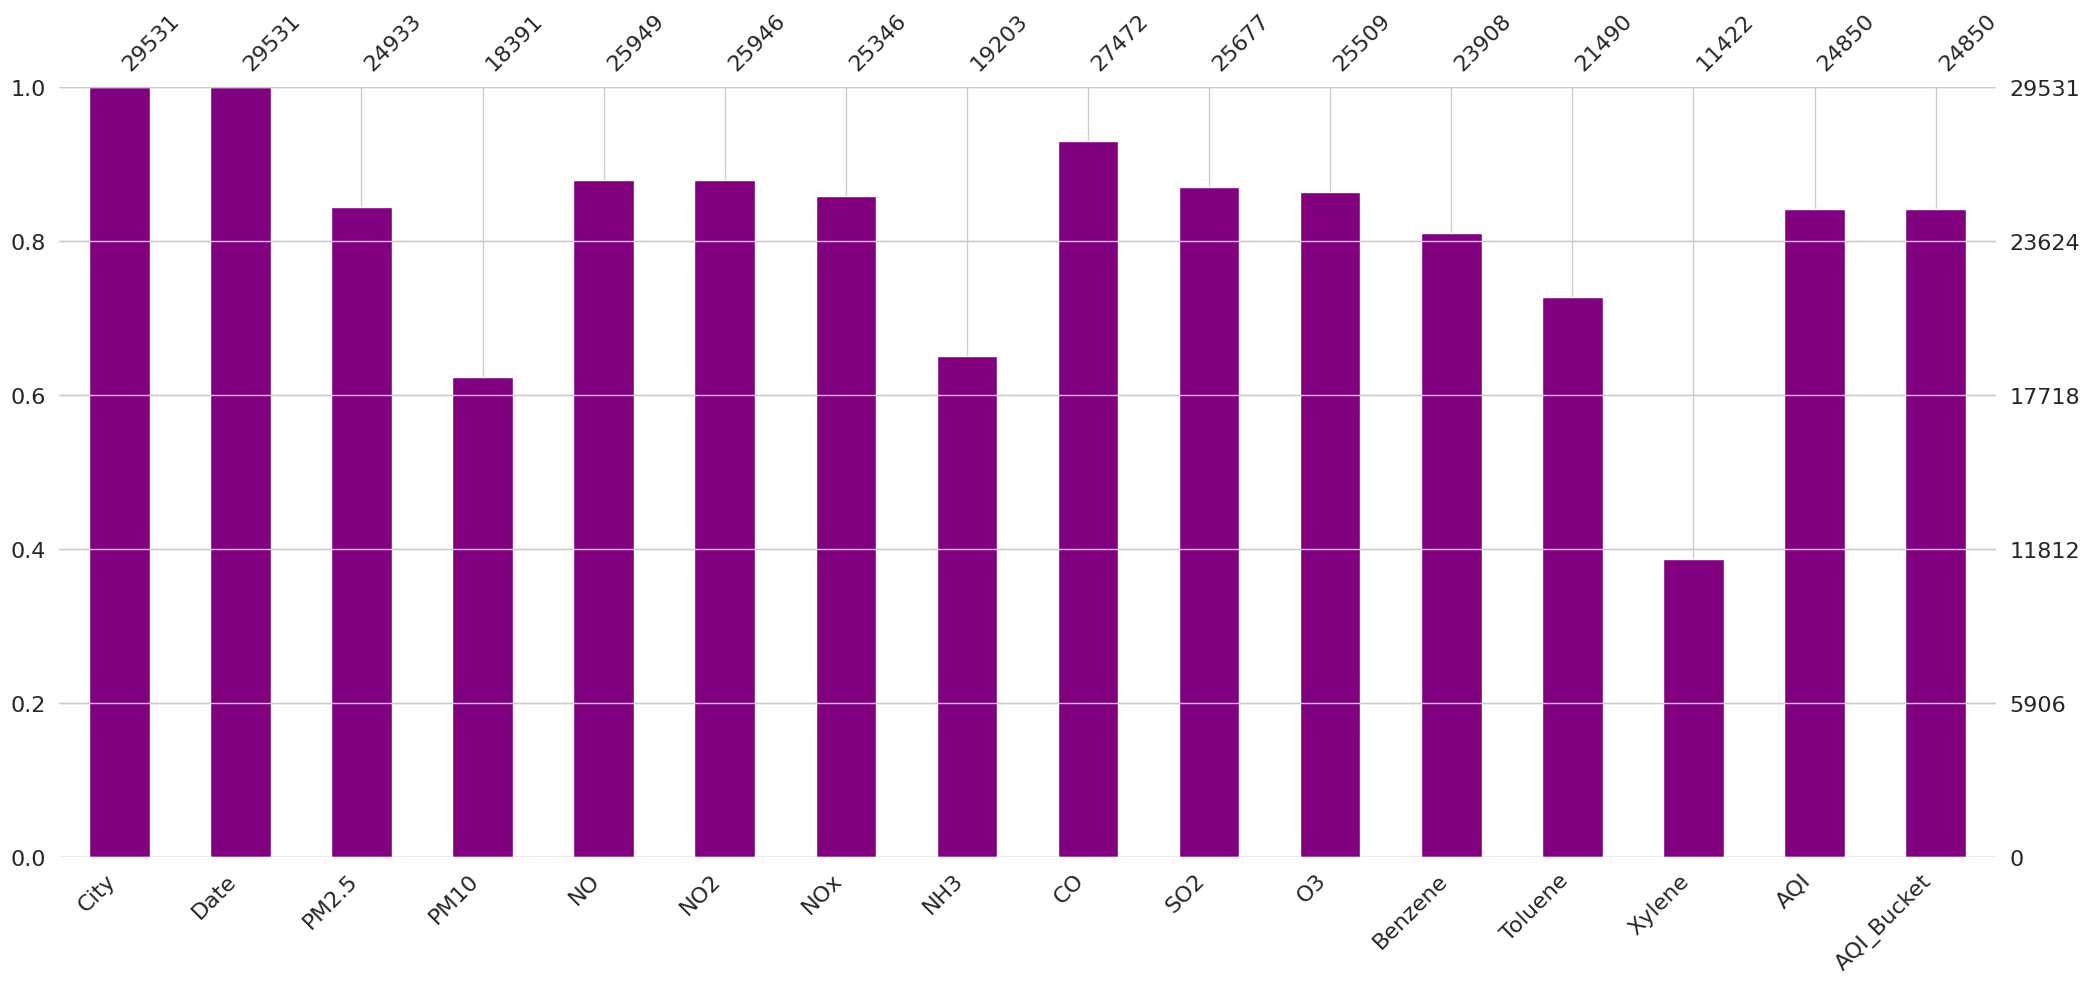

In [126]:
import missingno as msno
msno.bar(df, color="purple")

In [127]:
missing_values_per_cities = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_cities

/tmp/ipython-input-3208573697.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


In [128]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Data Cleaning

In [129]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [130]:
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
#Pollutant values vary a lot and often have outliers. Median is the safest and most accurate

df[features] = df[features].fillna(df[features].median())
#City-wise median is more accurate than global median

df[features] = df.groupby("City")[features].transform(lambda x: x.fillna(x.median()))

df['AQI'] = df['AQI'].fillna(df['AQI'].median())
df['AQI_Bucket'] = df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [131]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [132]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Handling Missing Values**

Most pollutants and AQI values in the dataset have missing values. To retain all data without dropping rows, median imputation is used for numeric columns (pollutants and AQI), as it is robust to outliers. For categorical columns like AQI_Bucket, the mode is used. Additionally, imputing values city-wise ensures that local pollution patterns are preserved. This approach fills missing values accurately while keeping the dataset complete.

**Feature Engineering**

In [133]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [134]:
df['month'] = df['Date'].dt.month

In [135]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
df['Season'] = df['month'].apply(get_season)

In [136]:
# 1. Coordinates table
city_coords = pd.DataFrame({
    'City': [
        'Kochi','Bhopal','Lucknow','Kolkata','Guwahati','Amaravati','Aizawl',
        'Thiruvananthapuram','Jaipur','Ernakulam','Bengaluru','Mumbai','Hyderabad',
        'Patna','Talcher','Shillong','Coimbatore','Visakhapatnam','Chennai',
        'Gurugram','Brajrajnagar','Amritsar','Jorapokhar','Delhi','Chandigarh','Ahmedabad'
    ],
    'Latitude': [
        9.9312, 23.2599, 26.8467, 22.5726, 26.1445, 16.5062, 23.7271,
        8.5241, 26.9124, 9.9816, 12.9716, 19.0760, 17.3850,
        25.5941, 20.9485, 25.5788, 11.0168, 17.6868, 13.0827,
        28.4595, 21.8100, 31.6340, 23.7975, 28.7041, 30.7333, 23.0225
    ],
    'Longitude': [
        76.2673, 77.4126, 80.9462, 88.3639, 91.7362, 80.6480, 92.7176,
        76.9366, 75.7873, 76.2999, 77.5946, 72.8777, 78.4867,
        85.1376, 85.1950, 91.8933, 76.9558, 83.2185, 80.2707,
        77.0266, 83.1666, 74.8723, 86.1955, 77.1025, 76.7794, 72.5714
    ]
})

In [137]:
#Merge coordinates with your main df
df_map = df.merge(city_coords, on='City', how='left')

<Axes: >

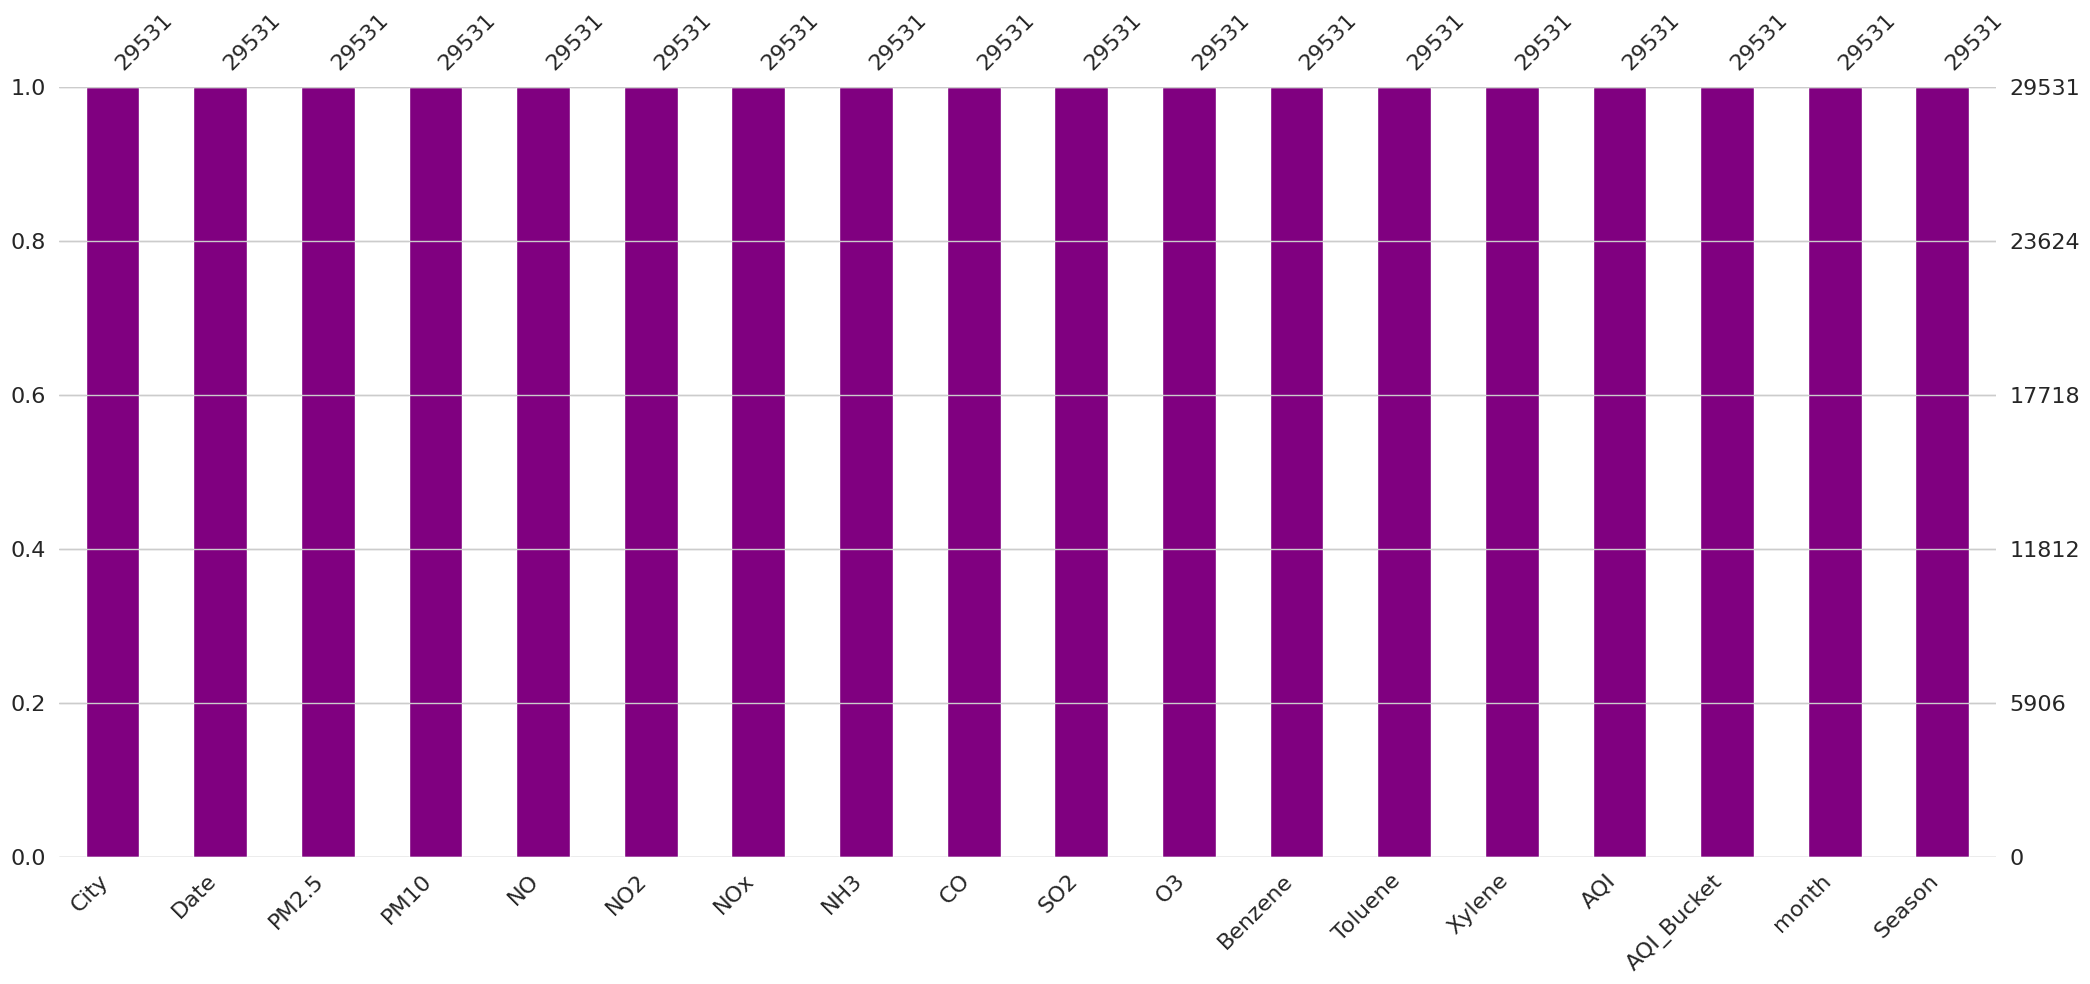

In [138]:
msno.bar(df, color="purple")

In [139]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,64.510857,0.04,32.15,48.57,72.45,949.99,59.807551
PM10,29531.0,109.659366,0.01,79.315,95.68,111.88,1000.0,72.32402
NO,29531.0,16.642601,0.02,6.21,9.89,17.57,390.68,21.506064
NO2,29531.0,27.726576,0.01,12.98,21.69,34.665,362.21,23.050531
NOx,29531.0,31.063568,0.0,14.67,23.52,36.015,467.63,29.477748
NH3,29531.0,20.813789,0.01,12.04,15.85,21.755,352.89,21.028862
CO,29531.0,2.153872,0.0,0.54,0.89,1.38,175.81,6.72466
SO2,29531.0,13.830897,0.01,6.09,9.16,13.81,193.86,17.005647
O3,29531.0,33.994121,0.01,20.74,30.84,42.73,257.73,20.202304


EDA

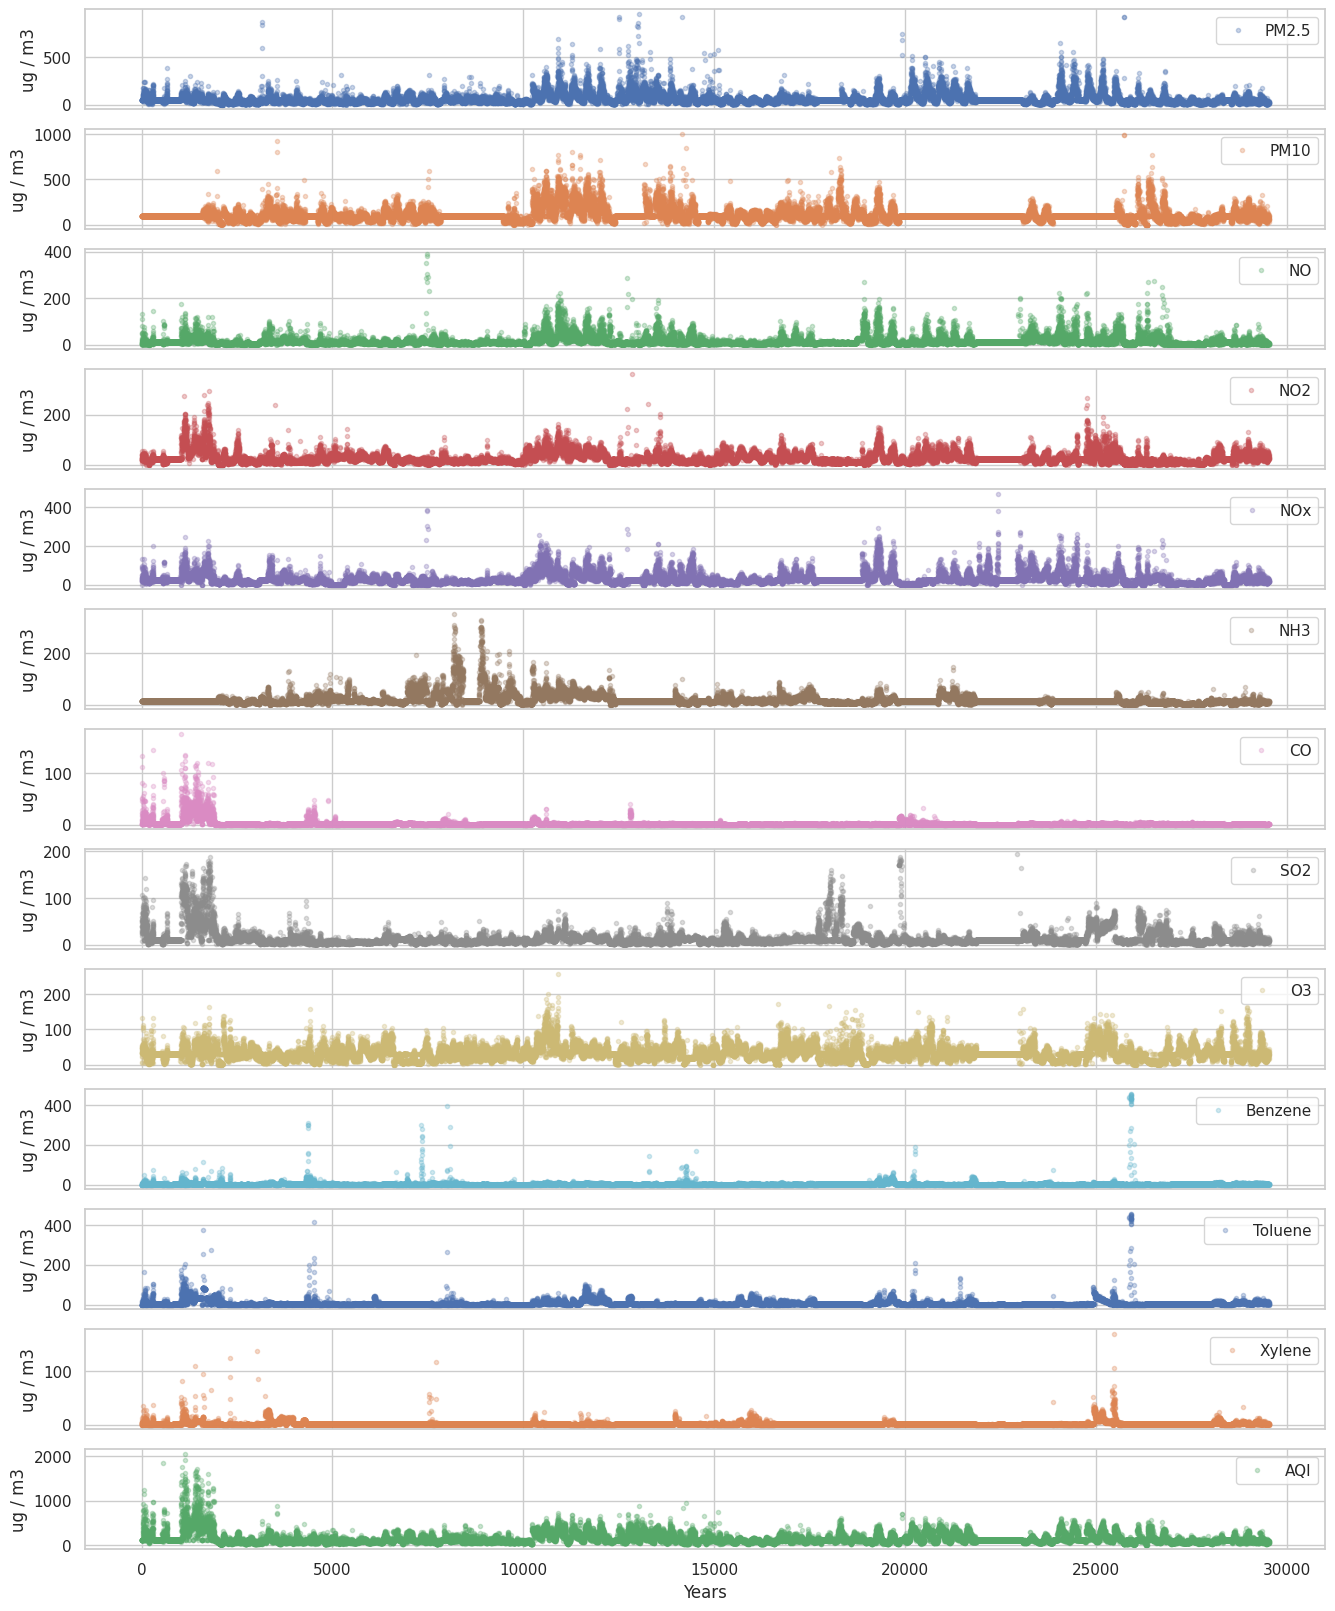

In [140]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']
axes = df[pollutants].plot(marker='.', alpha=0.3, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')        # plots shows variations of different parameters

In [141]:
import plotly.express as px

# Calculate the Average of each pollutant
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
mean_pollutants = df[pollutants].mean()

# Create the bar chart
fig = px.bar(
    x=pollutants,
    y=mean_pollutants,
    title='Average of Each Pollutant',
    labels={'x': 'Pollutant', 'y': 'Average Concentration'}
)

fig.show()

In [142]:
city_stats = df.groupby('City')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = pd.melt(city_stats,
                               id_vars=['City'],
                               value_vars=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_station = px.bar(city_stats_melted,
                     y='City',  # Move City to the y-axis
                     x='Average Concentration',  # Move Average Concentration to the x-axis
                     color='Pollutant',  # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by Station (Vertical Stacked)',
                     labels={'City': 'Cities', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')  # Keep the stacking behavior
fig_station.update_layout(
    height=800,  # Adjust height for better visibility
)

fig_station.show()

In [143]:
def max_polluted_cities(selected_pollutants):
    x1 = df[[selected_pollutants,'City']].groupby(["City"]).mean().sort_values(by=selected_pollutants,ascending=False).reset_index()
    x1[selected_pollutants] = round(x1[selected_pollutants],2)
    return x1[:6].style.background_gradient(cmap='OrRd')

In [144]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

pm2_5 = max_polluted_cities('PM2.5')
pm10 = max_polluted_cities('PM10')
no = max_polluted_cities('NO')
no2 = max_polluted_cities('NO2')
nox = max_polluted_cities('NOx')
NH3 = max_polluted_cities('NH3')
air_qua = max_polluted_cities('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no, no2, nox, NH3, air_qua)

,City,PM2.5
0,Delhi,117.130000
1,Gurugram,110.820000
2,Patna,110.550000
3,Lucknow,106.610000
4,Guwahati,63.660000
5,Kolkata,63.300000
,City,PM10
0,Delhi,227.550000
1,Talcher,152.210000
2,Gurugram,137.910000


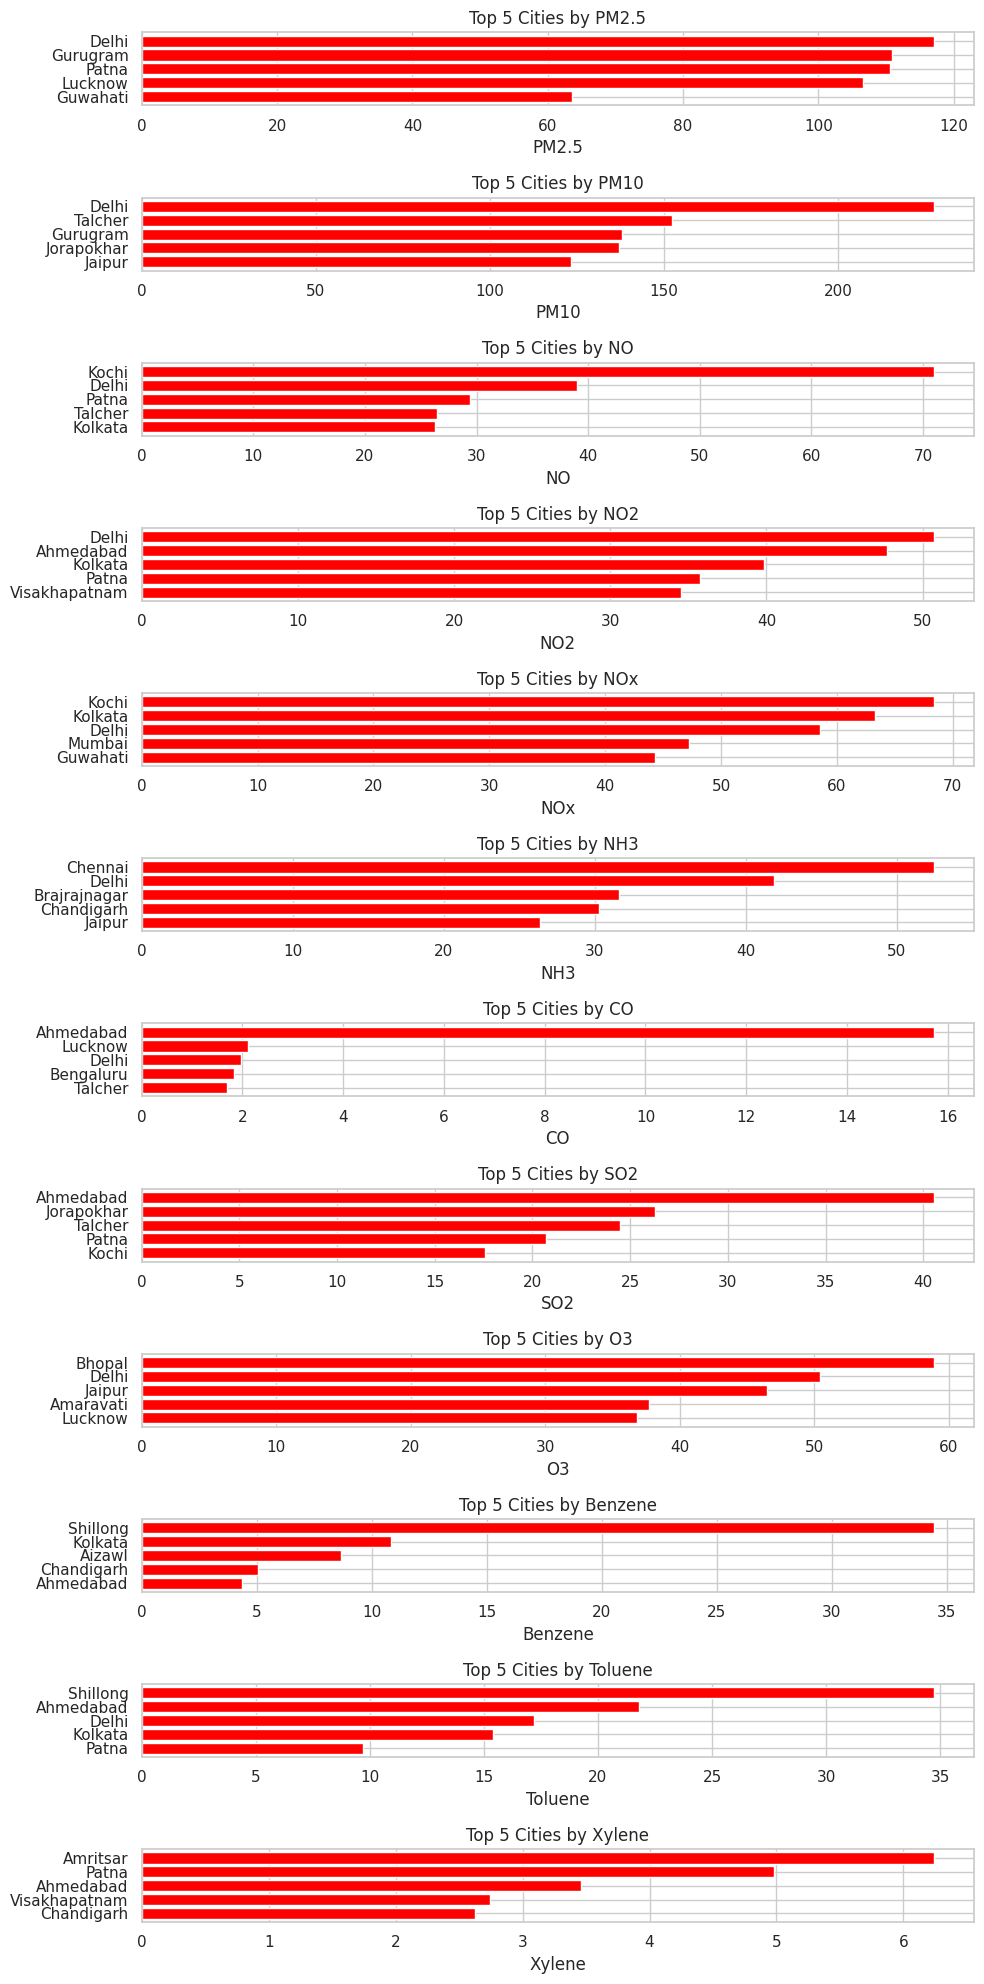

In [145]:
pollutant_columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Step 1: Group by station and calculate mean pollutant concentrations
mean_pollutant_by_station = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 5 stations for each pollutant
top_stations = {}
for pollutant in pollutant_columns:
    top_stations[pollutant] = mean_pollutant_by_station[pollutant].sort_values(ascending=False).head(5)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_stations[pollutant].index, top_stations[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


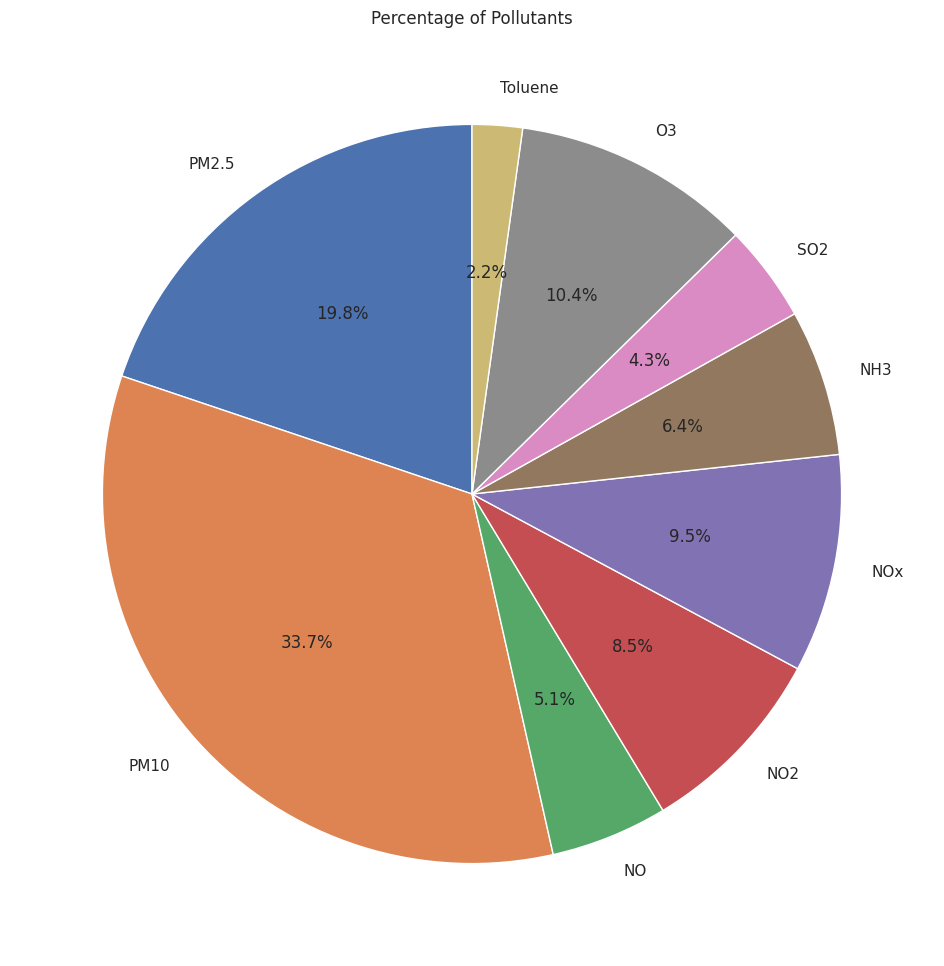

In [146]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','O3','Toluene']
total_pollutant_concentration = df[pollutants].sum().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(df[pollutant].sum() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(pollutant_percentages, labels=pollutants, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Pollutants')
plt.show()

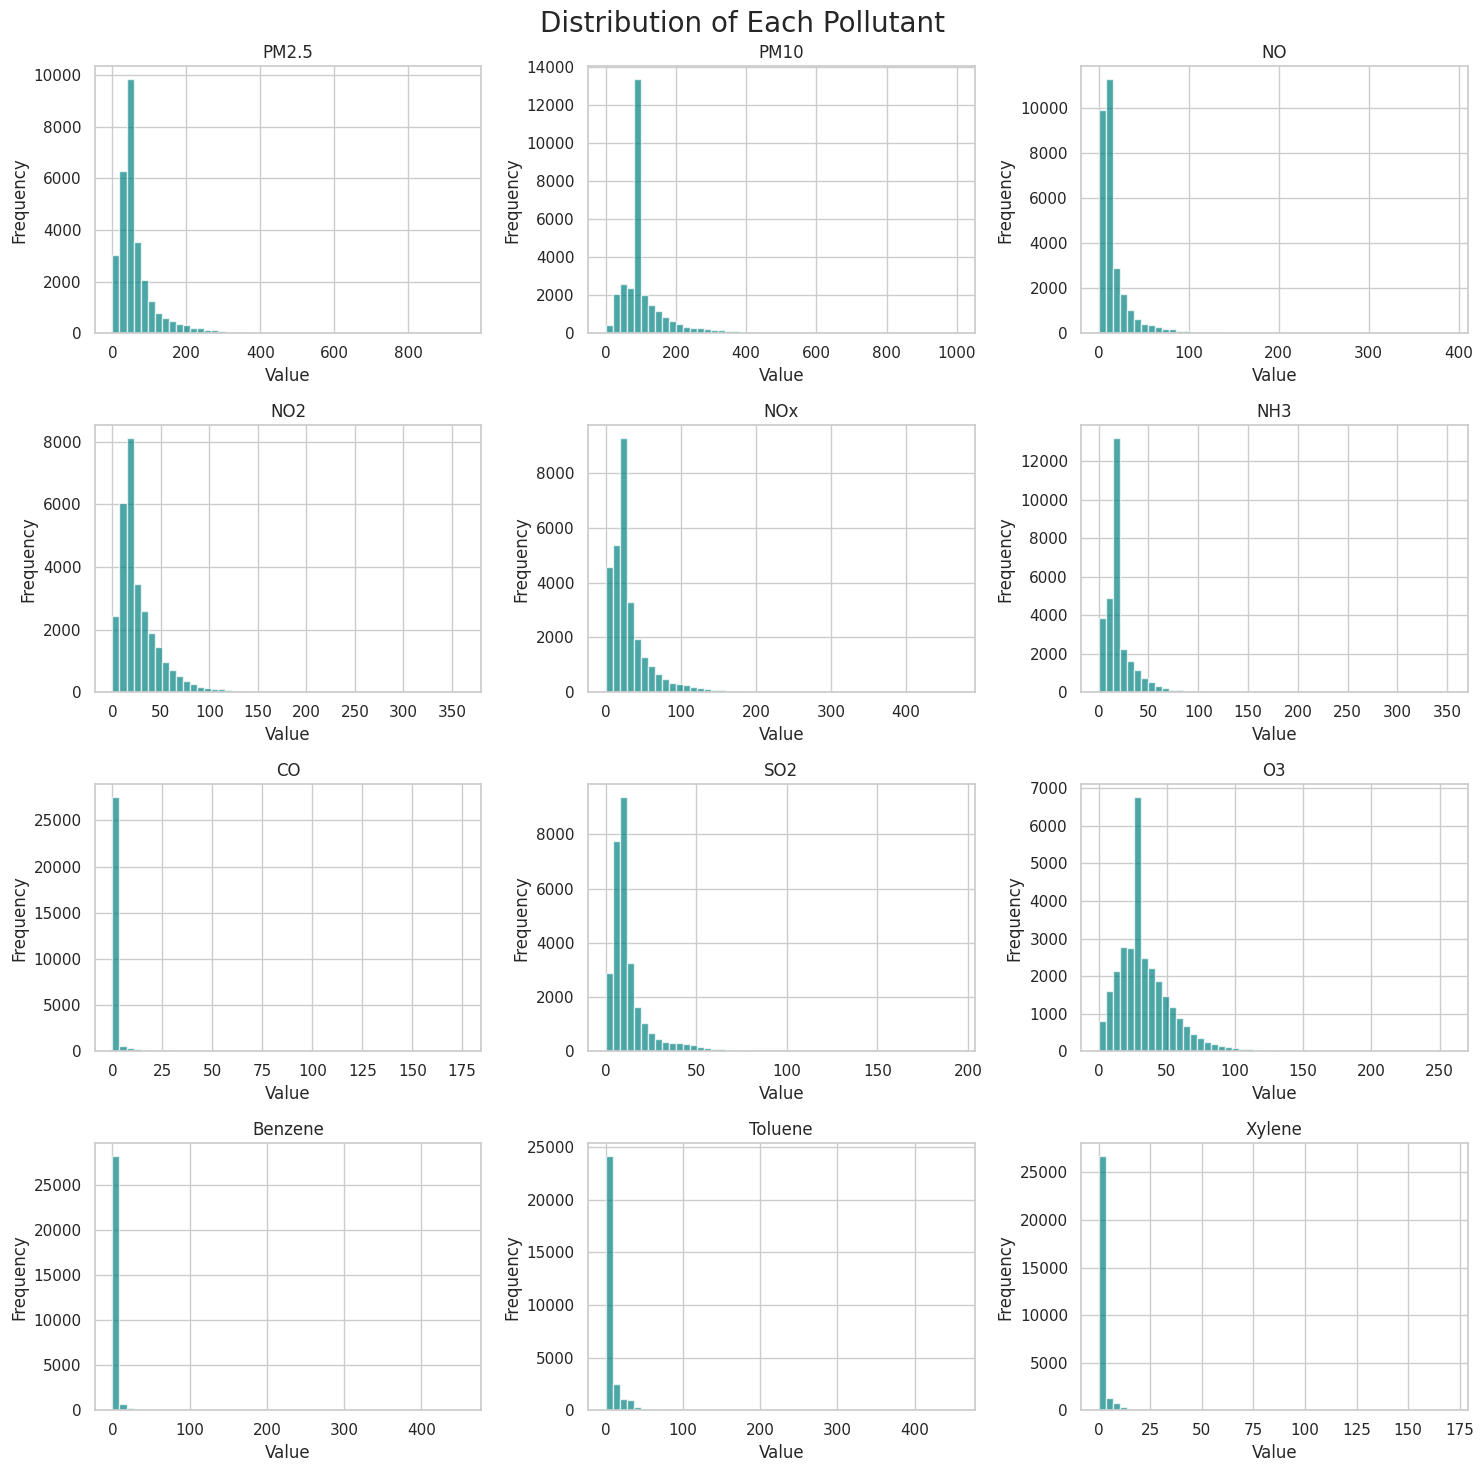

In [147]:
# Select numerical columns for visualization
numerical_columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(bins=50, ax=ax, color='teal', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribution of Each Pollutant", fontsize=20)
plt.tight_layout()
plt.show()

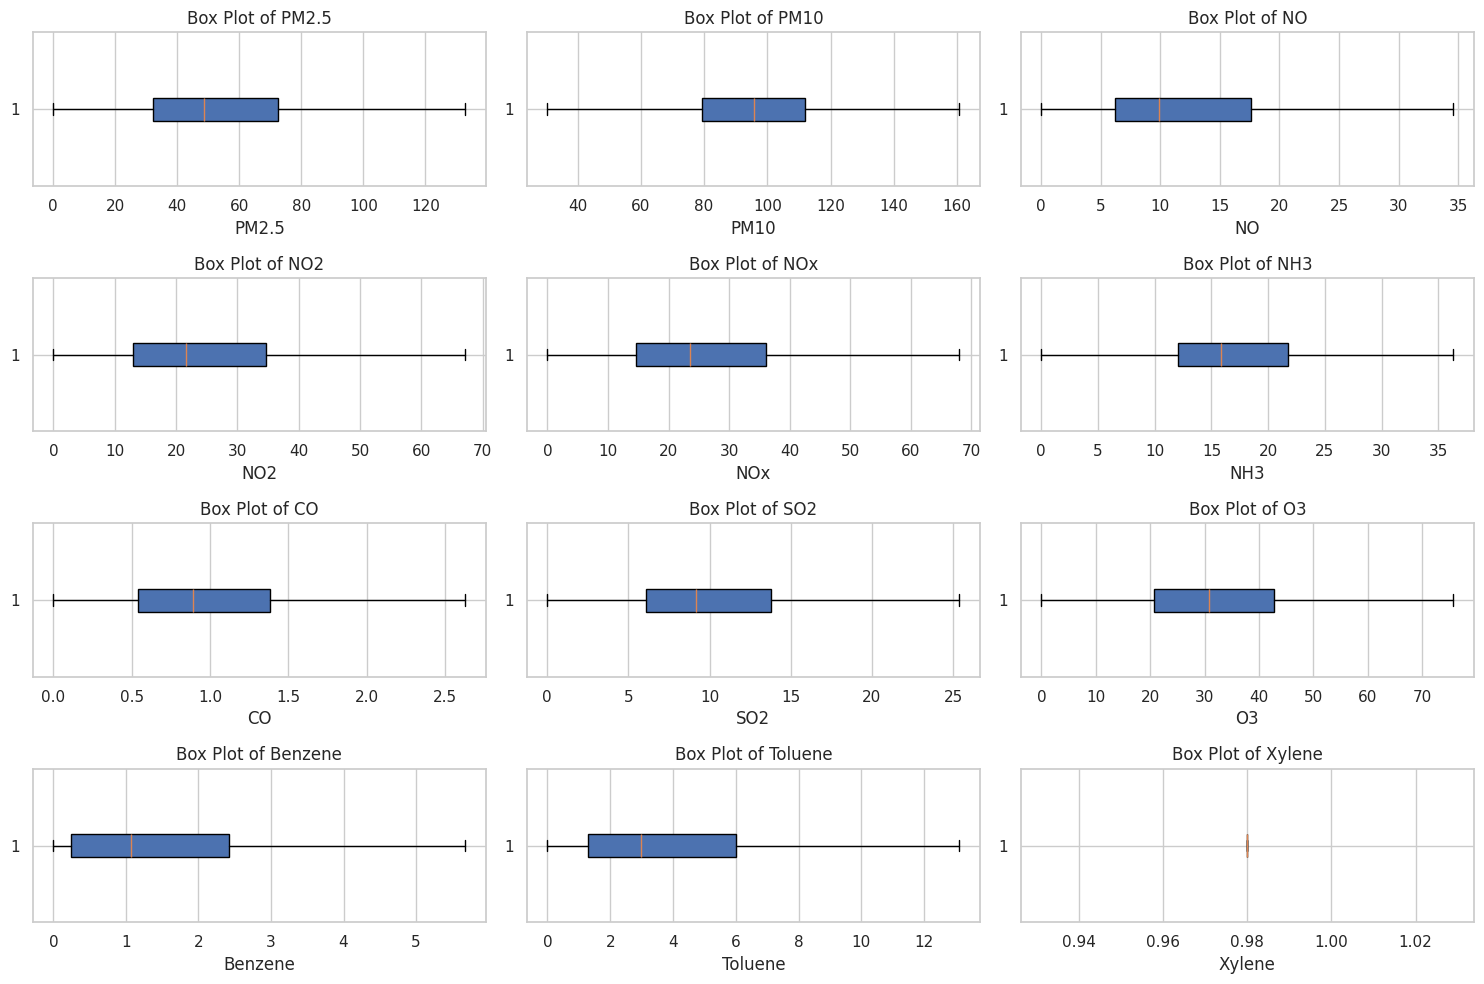

In [148]:
# Define the pollutants to analyze
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a box plot for each pollutant in a subplot
for i, pollutant in enumerate(pollutants):
    axes[i].boxplot(df[pollutant], vert=False, patch_artist=True, showfliers=False)
    axes[i].set_title(f'Box Plot of {pollutant}')
    axes[i].set_xlabel(pollutant)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Boxplots for Outlier Detection

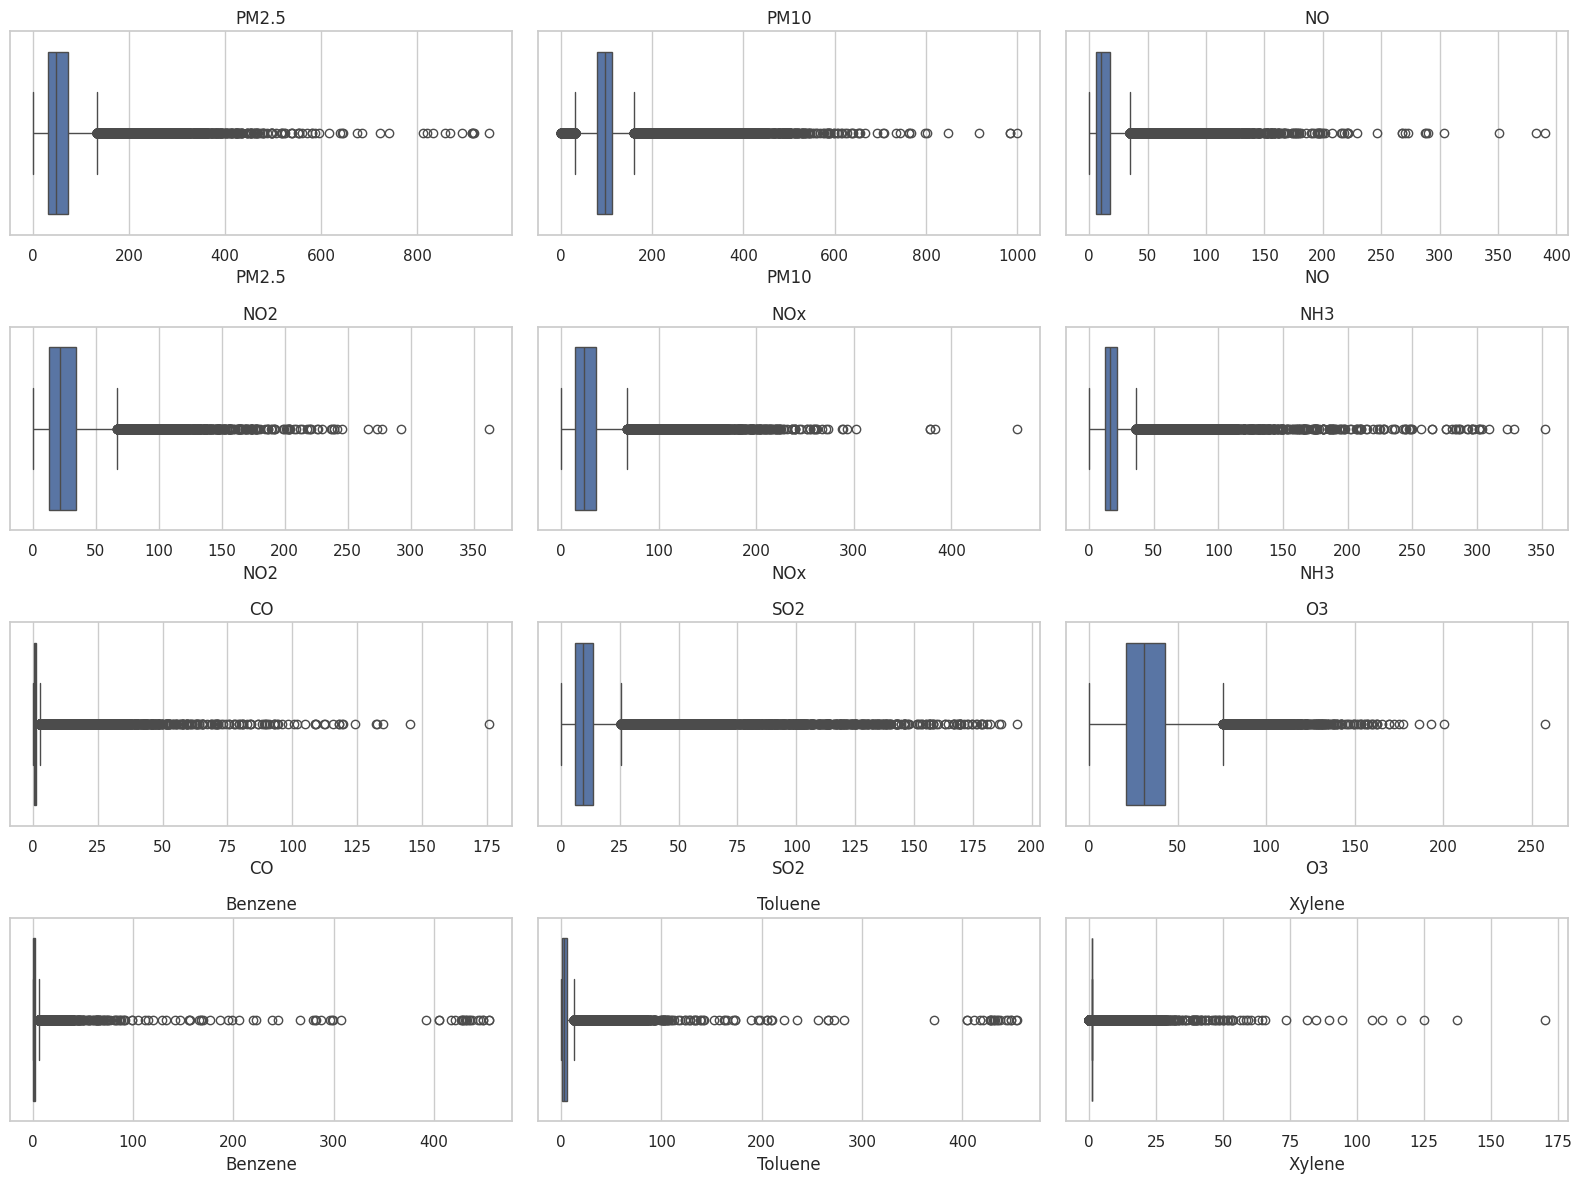

In [149]:
plt.figure(figsize=(16,12))
for i, col in enumerate(pollutants, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

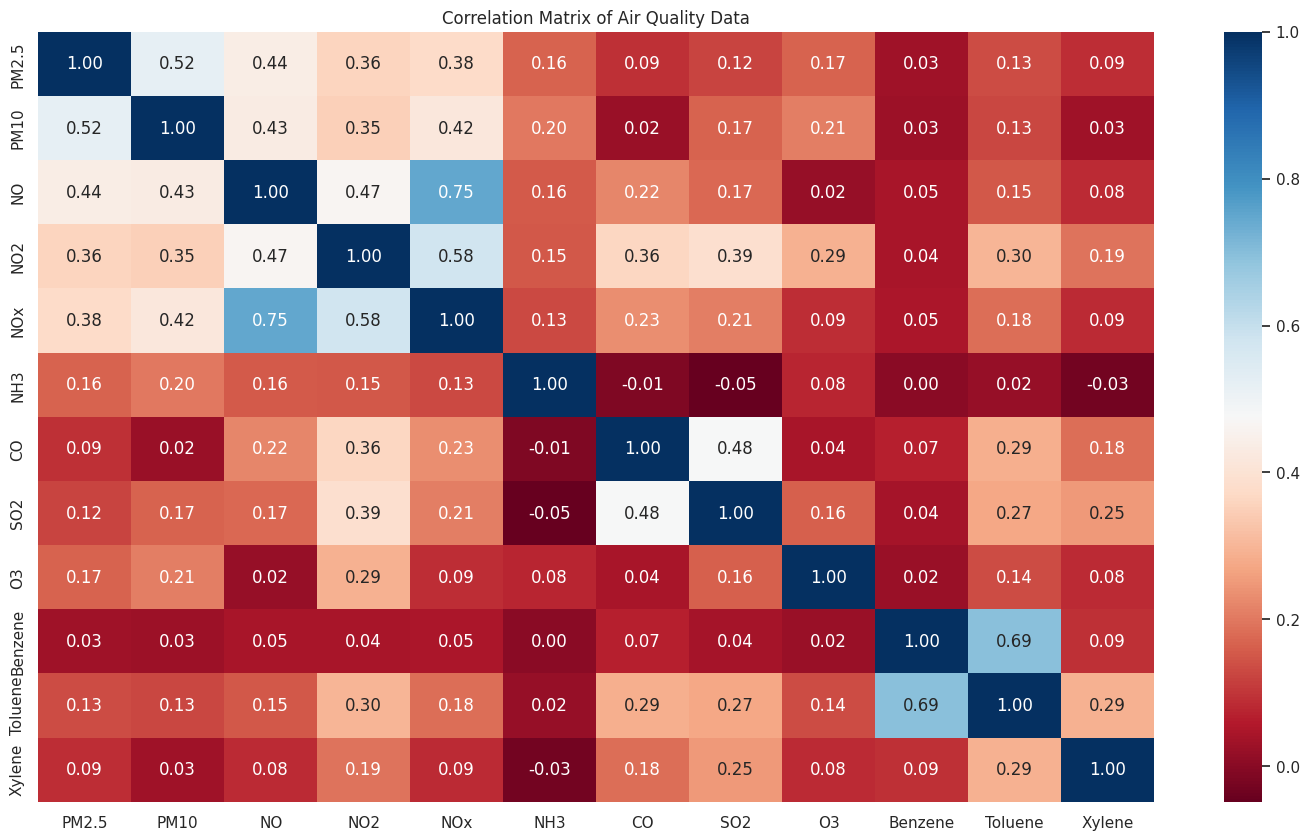

In [150]:
# Select only numeric columns for correlation calculation
pollutants =df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]

# Calculate the correlation matrix
correlation_matrix = pollutants.corr()

plt.figure(figsize=(18, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

In [151]:
# Select relevant columns for correlation analysis
corr_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
corr_matrix = df[corr_cols].corr()

# Create text annotations for percentages
text_annotations = np.around(corr_matrix.values, decimals=2)
text_annotations = text_annotations.astype(str)

# Creating heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_cols,
                   y=corr_cols,
                   colorscale='Inferno',
                   hoverongaps = False,
                   text=text_annotations,  # Add text annotations
                   texttemplate="%{text}"  # Format text as percentages
                   ))

fig.update_layout(title='Correlation Matrix of Weather Conditions and Pollutants')
fig.show()

In [152]:
# Group by season and calculate average pollutant concentrations
seasonal_avg = df.groupby('Season')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().reset_index()

# Melt the DataFrame for visualization
seasonal_avg_melted = pd.melt(seasonal_avg, id_vars=['Season'], var_name='Pollutant', value_name='Average Concentration')

# Create a bar chart to visualize seasonal trends
fig = px.bar(seasonal_avg_melted,
             x='Season',
             y='Average Concentration',
             color='Pollutant',
             title='Average Pollutant Concentrations by Season',
             barmode='group')

fig.show()

In [153]:
import folium

#Create summarized table per city for popup info
city_summary = df_map.groupby('City').agg({
    'AQI': 'mean',
    'PM2.5': 'mean',
    'PM10': 'mean'
}).reset_index()

city_summary = city_summary.merge(city_coords, on='City', how='left')

#Creating the map
center_lat = city_summary['Latitude'].mean()
center_lon = city_summary['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

colors = ['red','blue','green','purple','orange','darkblue',
          'pink','gray','black','lightblue','lightgreen','beige']

#Add markers with HTML popup
for i, row in city_summary.iterrows():

    popup_text = f"""
    <b>{row['City']}</b><br>
    Avg AQI: {row['AQI']:.1f}<br>
    Avg PM2.5: {row['PM2.5']:.1f}<br>
    Avg PM10: {row['PM10']:.1f}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=row['City'],
        popup=popup_text,
        icon=folium.Icon(color=colors[i % len(colors)])
    ).add_to(m)

m

AQI Bucket Distribution

/tmp/ipython-input-83894060.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




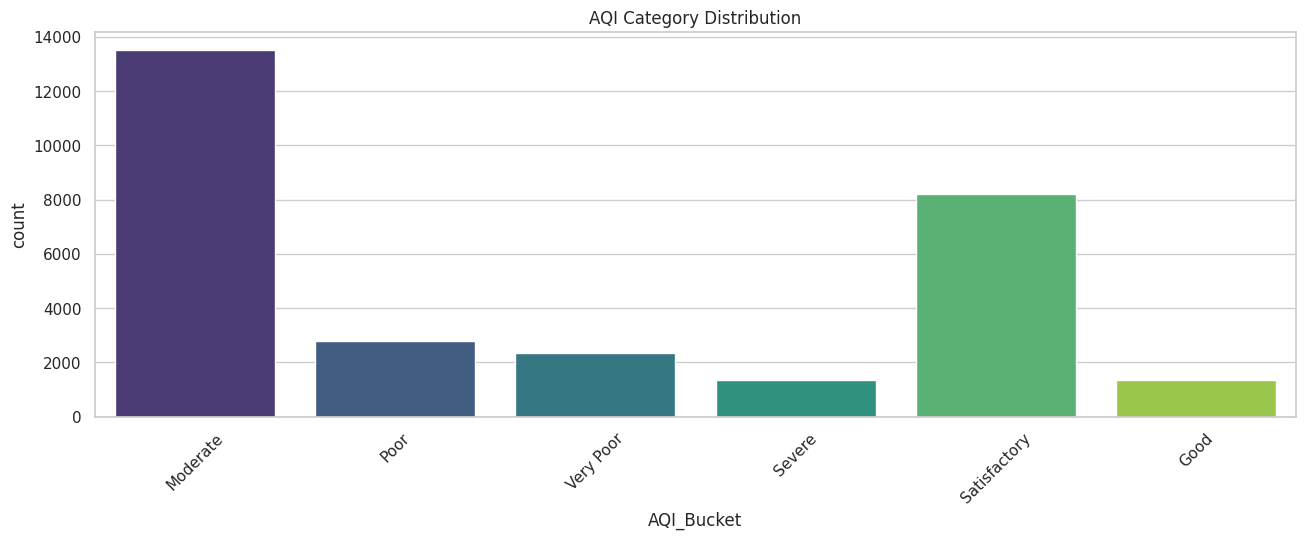

In [155]:
plt.figure(figsize=(15.5,5))
sns.countplot(data=df, x='AQI_Bucket', palette="viridis")
plt.title("AQI Category Distribution")
plt.xticks(rotation=45)
plt.show()

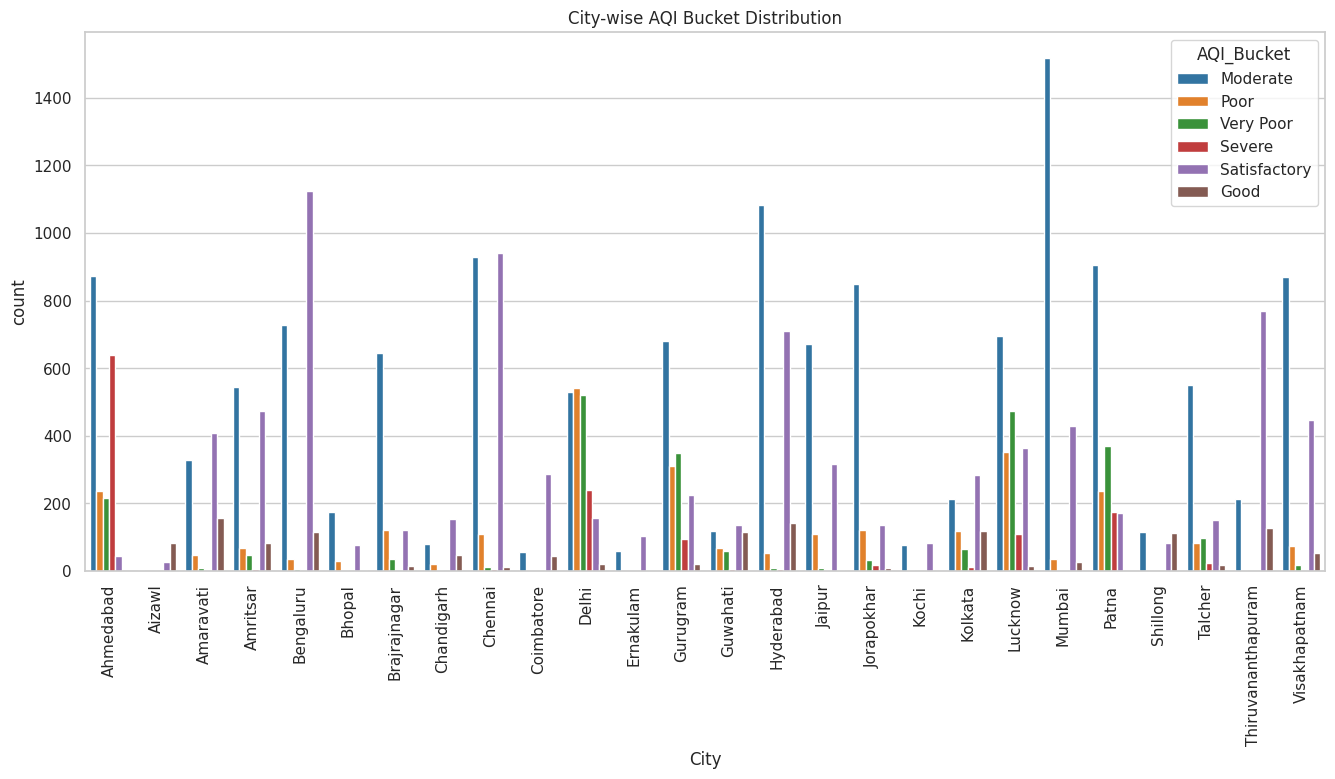

In [156]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x="City", hue="AQI_Bucket", palette="tab10")
plt.title("City-wise AQI Bucket Distribution")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

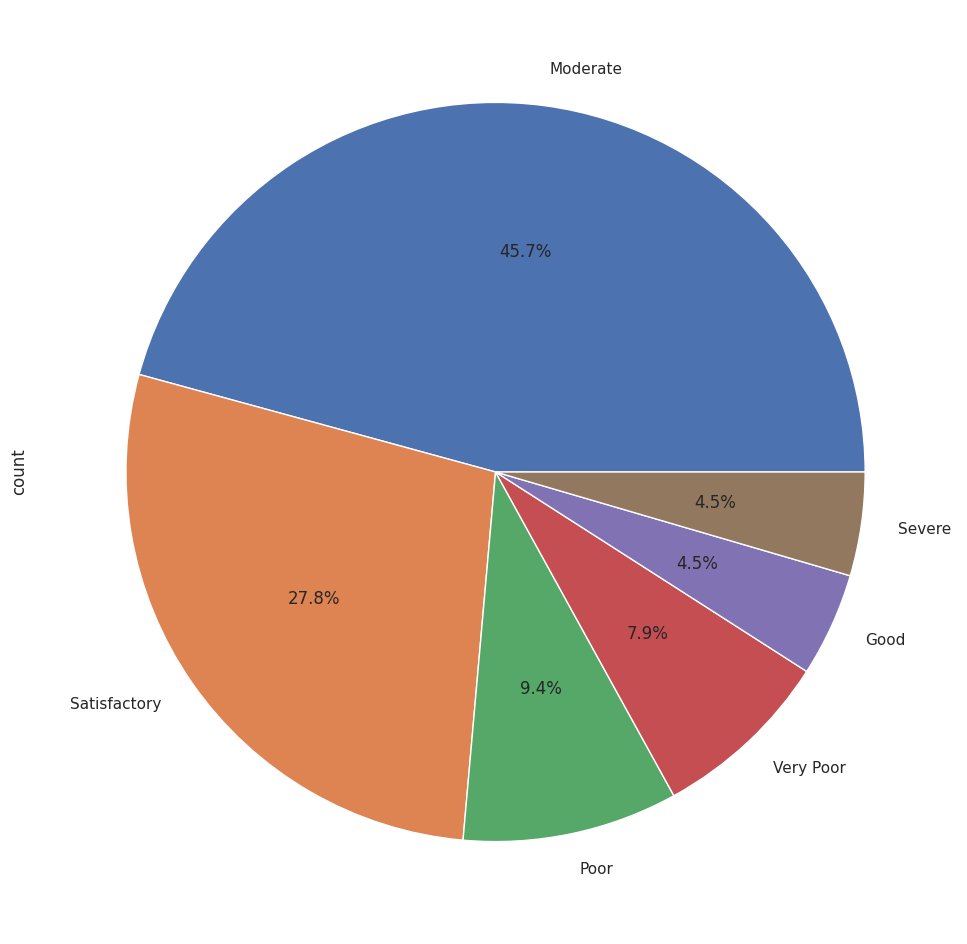

In [157]:
df['AQI_Bucket'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(12,12))


Time-based EDA Month

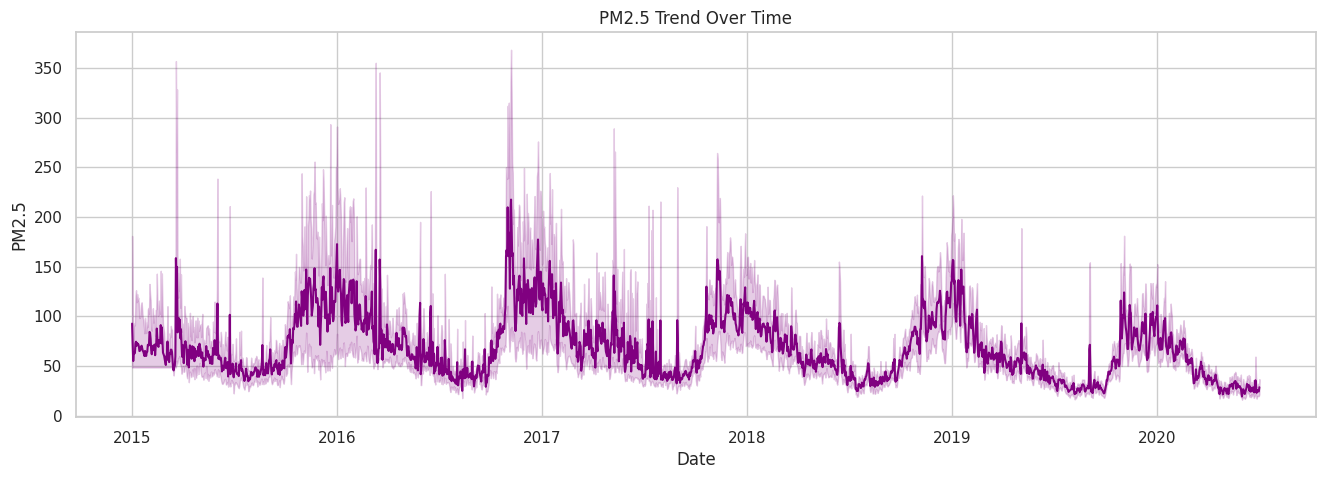

In [158]:
plt.figure(figsize=(16,5))
sns.lineplot(data=df, x="Date", y="PM2.5", color="purple")
plt.title("PM2.5 Trend Over Time")
plt.show()#takes little time to run

Seasonal Pollutant Levels

In [159]:
import plotly.express as px

pollu = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

monthly_mean = df.groupby('month')[pollu].mean().reset_index()

fig = px.line(
    monthly_mean,
    x="month",
    y=pollu,
    title="Monthly Mean Pollution Levels",
    markers=True
)

fig.update_layout(
    width=1300,
    height=700,
    hovermode="x unified"
)

fig.show()


In [161]:
# Calculate seasonal mean
seasonal_mean = df.groupby('Season')[pollu].mean().reset_index()

# Melt for Plotly
seasonal_long = seasonal_mean.melt(id_vars='Season', var_name='Pollutant', value_name='Value')

# Interactive Bar Chart
fig = px.bar(
    seasonal_long,
    x="Pollutant",
    y="Value",
    color="Season",
    barmode="group",
    title="Pollutant Concentration by Season",
    hover_name="Pollutant",
    hover_data={"Season": True, "Value": True}
)

fig.update_layout(
    width=1320,
    height=700,
    xaxis_title="Pollutant",
    yaxis_title="Mean Concentration",
)

fig.show()


City-wise Pollution Levels

In [162]:
city_avg = df.groupby('City')[pollu + ['AQI']].mean().sort_values(by='AQI', ascending=False)
city_avg.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,61.826292,99.509736,18.627297,47.726351,40.316098,15.850000,15.735580,40.569816,36.320139,4.369477,21.785241,3.460946,339.861623
Delhi,117.127835,227.553405,38.956630,50.756217,58.567023,41.880015,1.976053,15.532145,50.467153,3.544480,17.185042,1.260159,258.783474
Patna,110.553423,98.873746,29.443703,35.753127,43.501561,16.109209,1.481286,20.701200,36.290188,1.603332,9.681830,4.977745,214.414962
Lucknow,106.609681,95.680000,15.169497,33.106371,22.685719,22.589452,2.113041,9.924520,36.835819,2.797860,4.816307,0.980000,212.200597
Gurugram,110.817981,137.913520,16.905986,23.241423,27.800476,16.576081,1.233657,9.392633,34.162770,1.551959,4.759547,1.316123,210.704586


Plot top polluted cities:

In [163]:
fig = px.bar(
    city_avg.reset_index(),
    x="AQI",
    y="City",
    orientation='h',
    title="Average AQI by City",
    hover_data=["AQI"],
    color="City",
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color="black",
    width=0.6
)

fig.update_layout(
    width=1300,
    height=800,
    xaxis_title="Average AQI",
    yaxis_title="City",
    showlegend=False
)

fig.show()


Pollution Comparison Between Cities (Boxplots)

/tmp/ipython-input-2878013670.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




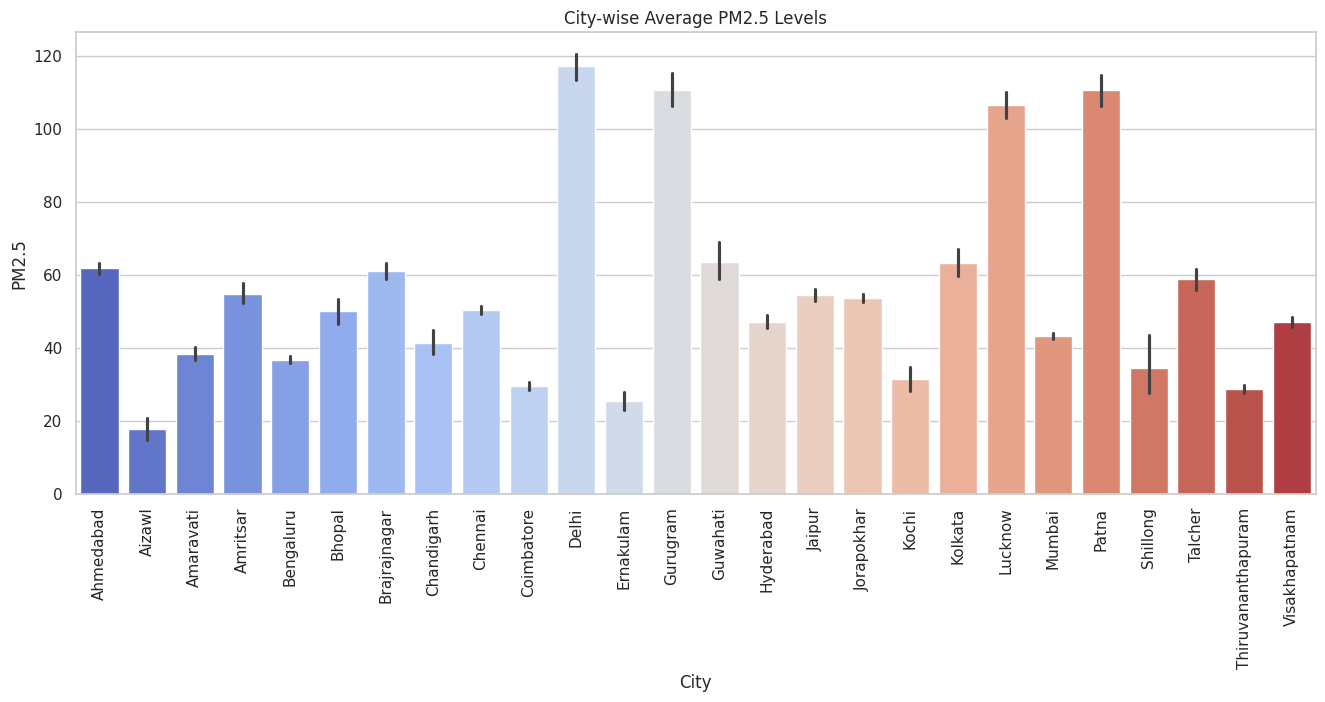

In [164]:
plt.figure(figsize=(16,6))
sns.barplot(data=df, x='City', y='PM2.5', estimator=np.mean, palette="coolwarm")
plt.title("City-wise Average PM2.5 Levels")
plt.xticks(rotation=90)
plt.show()

Prediction

In [165]:
# pollutants + VOCs

df_model = df[['AQI'] + features]

X = df_model[features]
y = df_model['AQI']

df_model.head()

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,118.0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00
1,118.0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77
2,118.0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25
3,118.0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00
4,118.0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78


Keeps only pollutant features + AQI

X = independent variables

y = dependent variable (AQI)

**Plot Linear Relationship**

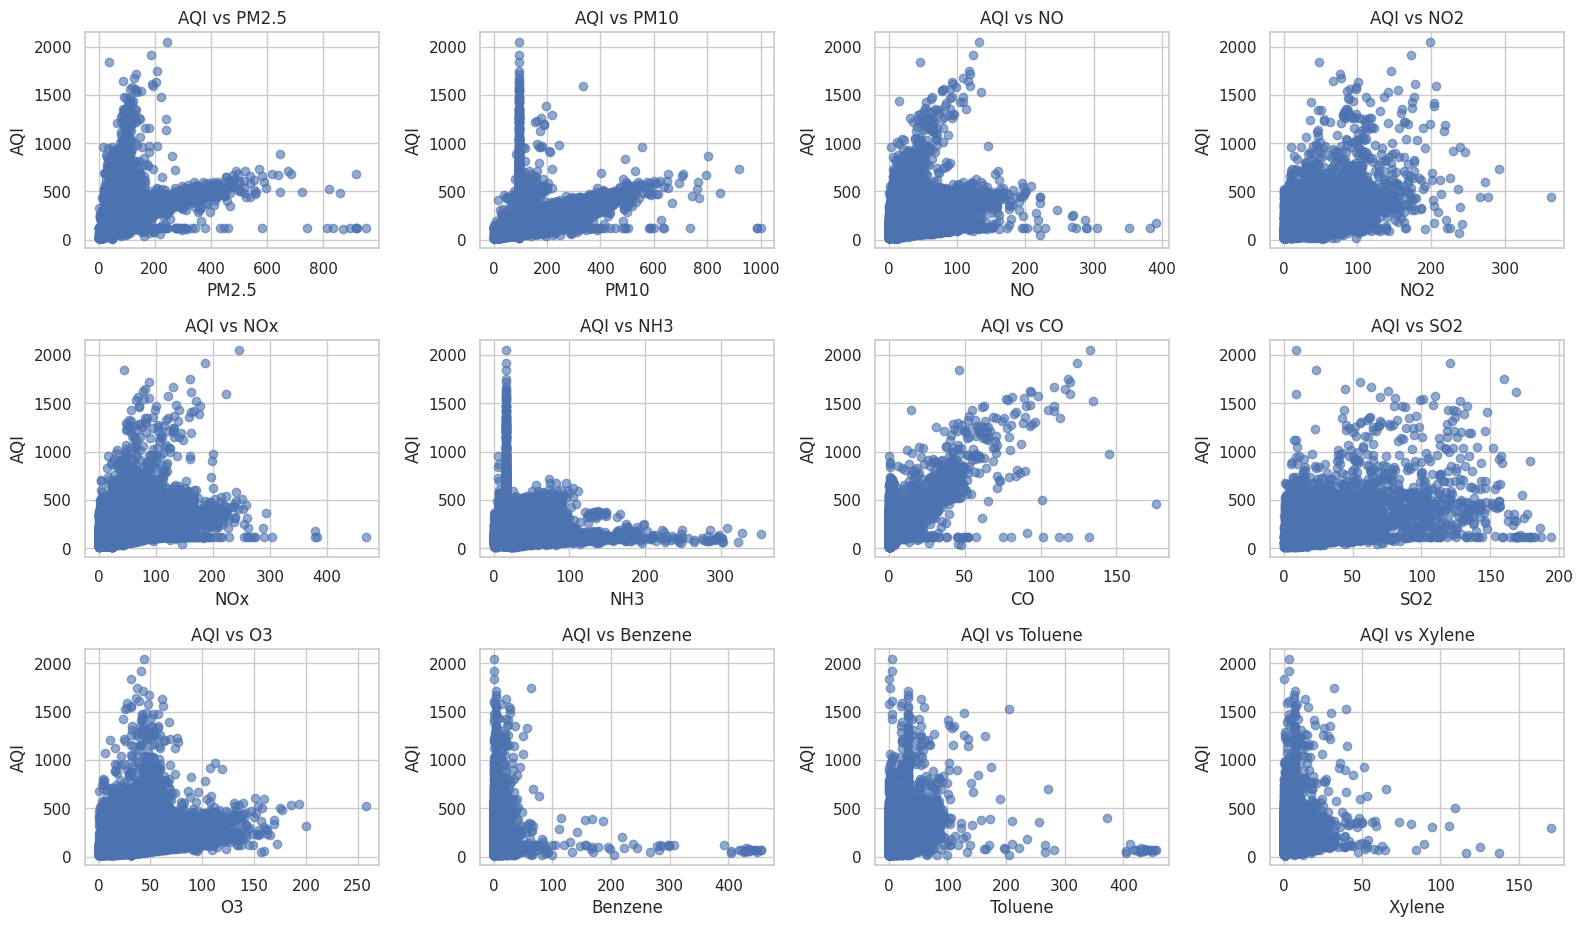

In [166]:
plt.figure(figsize=(16,12))

for i, col in enumerate(features):
    plt.subplot(4, 4, i+1)
    plt.scatter(df_model[col], y, alpha=0.6)
    plt.title(f"AQI vs {col}")
    plt.xlabel(col)
    plt.ylabel("AQI")

plt.tight_layout()
plt.show()

Plots each pollutant against AQI to visually inspect if linear regression is reasonable.
From your earlier plots. Only **CO** shows some linearity others do not.

**Train Test Split**

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

80% training

20% testing

random_state fixed for reproducibility

In [168]:
df_model

,AQI,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,118.0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00
1,118.0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77
2,118.0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25
3,118.0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00
4,118.0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,41.0,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,70.0,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,68.0,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,54.0,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00


In [169]:
print(X_train)

        PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2     O3  \
6688   142.27  252.49  17.11  33.82  50.91   9.80  4.36  17.18  17.68   
29333   75.61  121.94   2.95  27.03  16.78  15.92  1.12   8.24  74.21   
27996   15.01   27.65   3.25   7.99   9.71   6.01  0.48   5.80  29.78   
26848   48.57   95.68   9.89  21.69  23.52  15.85  0.89   9.16  30.84   
21186   16.66   95.68   7.44  28.00  23.79  28.83  0.82   5.03  14.32   
...       ...     ...    ...    ...    ...    ...   ...    ...    ...   
21575   21.75   95.68   7.97  18.64  16.24   2.02  0.91   4.19  26.03   
5390    38.06   74.54   9.91  42.23  22.62  15.85  1.04   3.20  25.89   
860     48.57   95.68   9.89  21.69  23.52  15.85  0.89   9.16  30.84   
15795   36.08   95.82   5.67  31.21  18.75  15.34  0.70   5.92  48.88   
23654   65.29  121.72  23.97  36.28  59.59  34.63  1.01   9.91  19.03   

       Benzene  Toluene  Xylene  
6688      0.00     2.97    0.98  
29333     4.93     7.53    1.13  
27996     1.07     2.

In [170]:
print(X_test)

        PM2.5    PM10     NO    NO2    NOx     NH3    CO    SO2     O3  \
22593   48.57   95.68   9.89  21.69  23.52   15.85  0.00   9.16  30.84   
22459   48.57   95.68   9.89  21.69  23.52   15.85  0.00   9.16  30.84   
24213   58.50   95.68  11.23  17.05  28.29   15.85  1.14   5.13  24.20   
25301   78.57   95.68   6.85   5.45   5.57   15.85  1.33  39.86  71.68   
20886  200.80   95.68  40.04  50.59  60.42   35.47  1.22   9.71  42.18   
...       ...     ...    ...    ...    ...     ...   ...    ...    ...   
17614   31.20   81.56   3.07  12.75  13.24   18.84  0.54  14.14  51.63   
6198    38.15   87.04   4.96  26.49  27.94   12.13  0.93   7.97  55.40   
9648    65.45   84.77   4.19  16.87  20.82   86.50  0.66   8.04  36.82   
16507   35.21   66.35   6.95  18.03  14.06   13.20  0.41   3.48  29.34   
7395    66.86  156.78  22.58  22.93  37.21  117.44  0.02   5.32  35.68   

       Benzene  Toluene  Xylene  
22593     1.07     2.97    0.98  
22459     1.07     2.97    0.98  
24213    

In [171]:
print(y_train)

6688     325.0
29333    128.0
27996     46.0
26848    118.0
21186     69.0
         ...  
21575     70.0
5390      73.0
860      118.0
15795    101.0
23654    111.0
Name: AQI, Length: 23624, dtype: float64


In [172]:
print(y_test)

22593    118.0
22459    118.0
24213    137.0
25301    190.0
20886    339.0
         ...  
17614     79.0
6198      91.0
9648     106.0
16507     68.0
7395     136.0
Name: AQI, Length: 5907, dtype: float64


In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [175]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("------------------------------------")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Coefficient of Determination (R² Score): {r2:.3f}")

Linear Regression Model Evaluation:
------------------------------------
Root Mean Squared Error (RMSE): 54.458
Mean Squared Error (MSE): 2965.684
Coefficient of Determination (R² Score): 0.807


**Display Model Coefficients**

In [176]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
6,CO,70.706502
0,PM2.5,59.605095
1,PM10,19.036418
7,SO2,10.737270
3,NO2,8.623418
4,NOx,4.275511
8,O3,4.205882
10,Toluene,3.026174
11,Xylene,0.218815
5,NH3,-1.333675


Positive coefficient → increase in pollutant increases AQI

Negative coefficient → pollutant associated with lower AQI

Large magnitude → strong influence

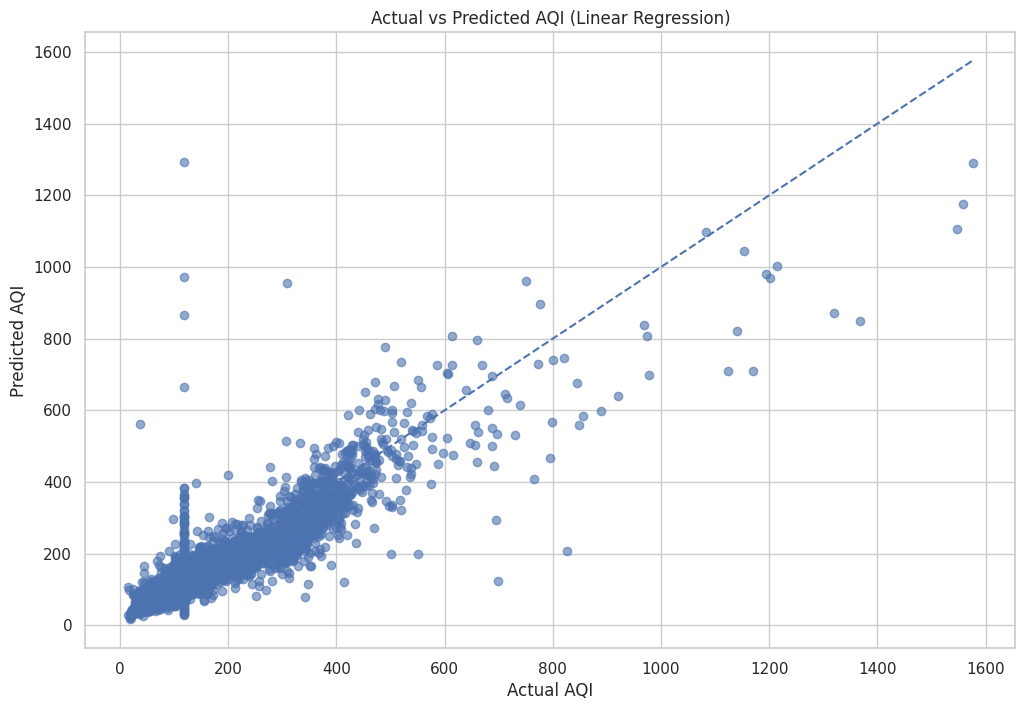

In [177]:
plt.figure(figsize=(12,8))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")

# Add a 45-degree reference line
xmin = min(y_test.min(), y_pred.min())
xmax = max(y_test.max(), y_pred.max())
plt.plot([xmin, xmax], [xmin, xmax], linestyle='--')

plt.show()

**Decision Tree Regresson**

In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)   # Trees don't need scaling

dt_pred = dt.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Model Evaluation:")
print("---------------------------------")
print(f"RMSE: {dt_rmse:.3f}")
print(f"MSE: {dt_mse:.3f}")
print(f"R² Score: {dt_r2:.3f}")

Decision Tree Model Evaluation:
---------------------------------
RMSE: 54.045
MSE: 2920.884
R² Score: 0.810


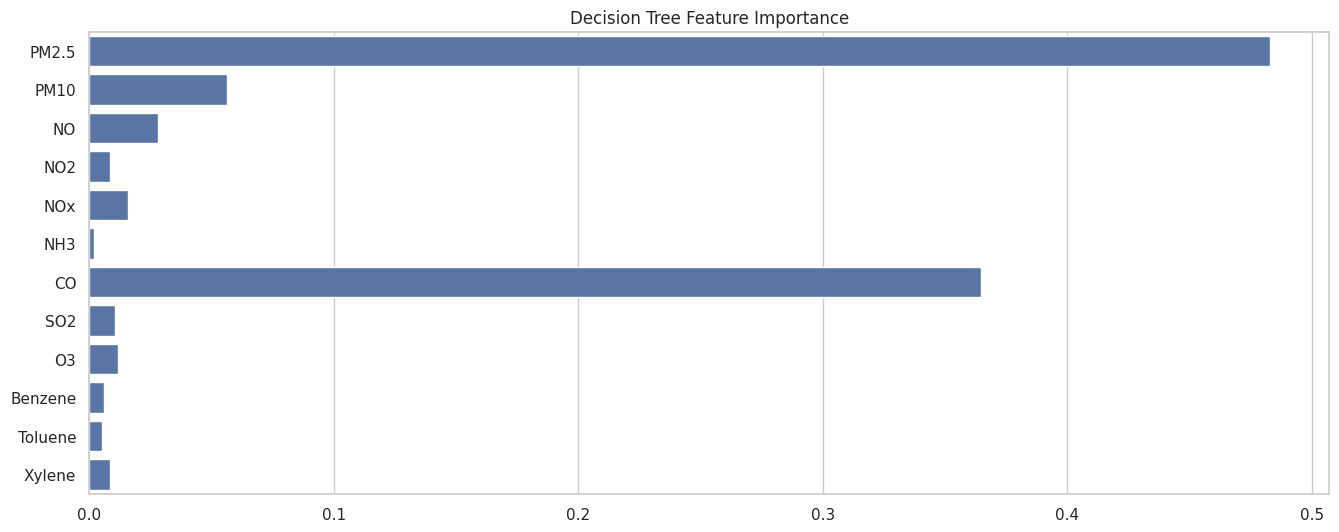

In [179]:
plt.figure(figsize=(16,6))
sns.barplot(x=dt.feature_importances_, y=features)
plt.title("Decision Tree Feature Importance")
plt.show()

**Random Forest Regressor**

In [180]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Model Evaluation:")
print("--------------------------------")
print(f"RMSE: {rf_rmse:.3f}")
print(f"MSE: {rf_mse:.3f}")
print(f"R² Score: {rf_r2:.3f}")

Random Forest Model Evaluation:
--------------------------------
RMSE: 43.388
MSE: 1882.500
R² Score: 0.878


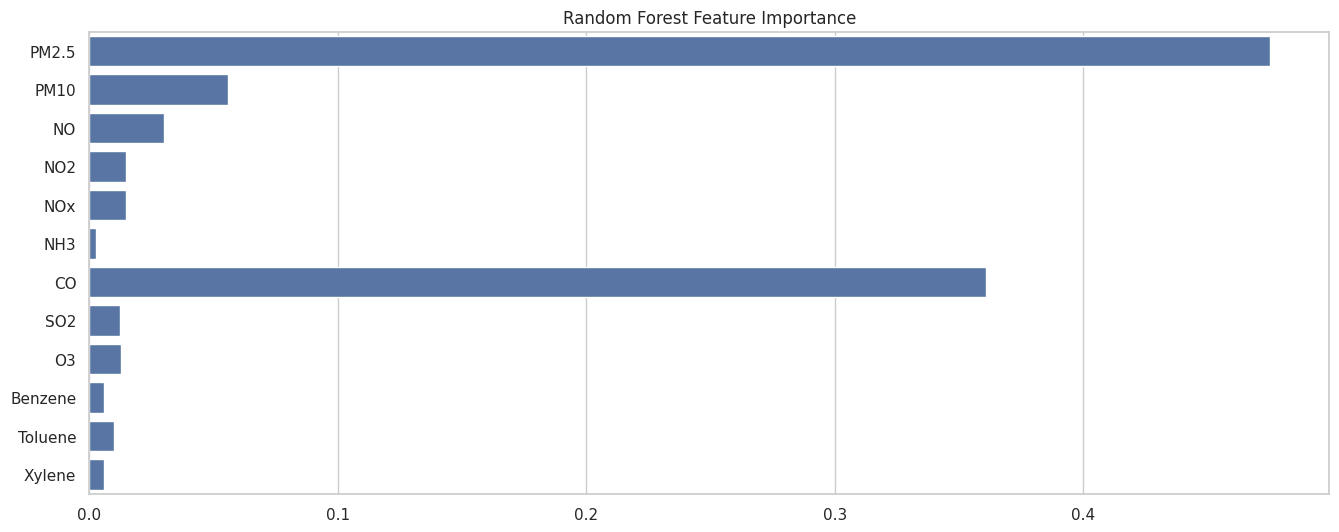

In [181]:
plt.figure(figsize=(16,6))
sns.barplot(x=rf.feature_importances_, y=features)
plt.title("Random Forest Feature Importance")
plt.show()

**Compare All Models**

In [182]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2, dt_r2, rf_r2],
    'RMSE': [rmse, dt_rmse, rf_rmse]
})

results.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,RMSE
2,Random Forest,0.877716,43.387782
1,Decision Tree,0.810264,54.045203
0,Linear Regression,0.807354,54.458096


/tmp/ipython-input-3306850675.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




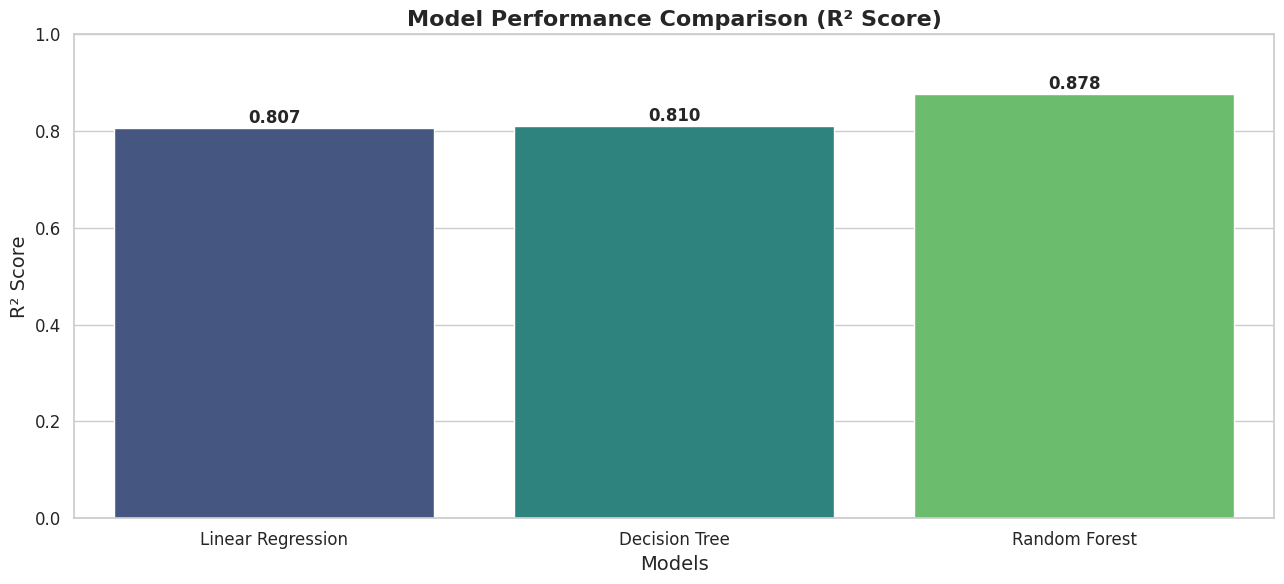

In [183]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2, dt_r2, rf_r2]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(13,6))

colors = sns.color_palette("viridis", len(model_names))

ax = sns.barplot(x=model_names, y=r2_scores, palette=colors)

for i, v in enumerate(r2_scores):
    ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1)
plt.title("Model Performance Comparison (R² Score)", fontsize=16, fontweight='bold')
plt.ylabel("R² Score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Model Performance Summary**

Three models were tested for AQI prediction: **Linear Regression**, **Decision Tree**, and **Random Forest**. Linear Regression gave an R² of 0.80, showing moderate performance. The Decision Tree slight improved accuracy with an R² of 0.81, capturing non-linear relationships better. The Random Forest performed the best with an R² of 0.87 and the lowest RMSE, making it the most accurate and reliable model for AQI prediction. Overall, Random Forest is the most suitable model for this dataset.